# UE22CS342AA2: Data Analytics - Worksheet 3a
# Time Series Analysis and Forecasting Techniques

Designed by Anshul Ranjan, Dept.of CSE - itsanshulranjan@gmail.com

## Student Details

• Name: Aditya P

• SRN: PES1UG22CS040

• Section: 'A'

## Air Passengers Analysis
Imagine you're optimizing airline services. \
You've been given a dataset, your task is to analyze monthly trends in air passenger numbers to inform decisions such as route planning, pricing strategies, and enhancing the overall travel experience.

### Contents of the worksheet

It is suggested to have a grip on the theoretical concepts of:

* Components of time series data 
* Decomposition of time series data
* Exponential Smoothing techniques
* Stationary Signals, Dickey-fuller test and Differencing
* Forecasting with AR, MA, ARMA
* Autocorrelation (ACF, PACF) and ARIMA
* Seasonality in Time Series and SARIMA

### Dataset

The data is provided in the AirPassengers.csv file. The data dictionary is as follows:

* Month: The month of the year (formatted as 'YYYY-MM') during which passenger data was collected.
* Passengers: The number of air passengers recorded during that month.

The target variable is **Passengers**, which we shall analyze and forecast in this worksheet. Understanding the trends and patterns in air passenger data is crucial for airline route planning, pricing strategies, capacity management, and enhancing the overall travel experience. Accurately predicting passenger volumes aids in optimizing resources, scheduling, and making informed decisions to meet market demands and improve service quality.

In [1]:
# Load necessary libraries
library(dplyr) 
library(tidyr)  
library(ggplot2) 

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Data Ingestion and Preprocessing
• Reading this file into a data.frame object

In [2]:
# Read the CSV file
df <- read.csv('/kaggle/input/flight-attendees/AirPassengers.csv')

# Display information about the data frame
str(df)

'data.frame':	144 obs. of  2 variables:
 $ Month       : chr  "1949-01" "1949-02" "1949-03" "1949-04" ...
 $ X.Passengers: int  112 118 132 129 121 135 148 148 136 119 ...


In [3]:
head(df)

,Month,X.Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


The class (data type) of each column in the data frame

In [4]:
sapply(df, class)

Month X.Passengers 
 "character"    "integer"

In [5]:
# Convert 'Month' to Date type
df$Month <- as.Date(paste0(df$Month, "-01"), format="%Y-%m-%d")

# Check the data types of the columns
sapply(df, class)

Month X.Passengers 
      "Date"    "integer"

In [6]:
length(unique(df$Month))

[1] 144

In [7]:
# Rename columns
df <- df %>% rename(value = X.Passengers, month = Month)
head(df)

,month,value
,<date>,<int>
1,1949-01-01,112
2,1949-02-01,118
3,1949-03-01,132
4,1949-04-01,129
5,1949-05-01,121
6,1949-06-01,135


Setting the 'Month' column as the index of the DataFrame to organize the data by time, then plotting the data to visualize the trend in passenger numbers over the given months.

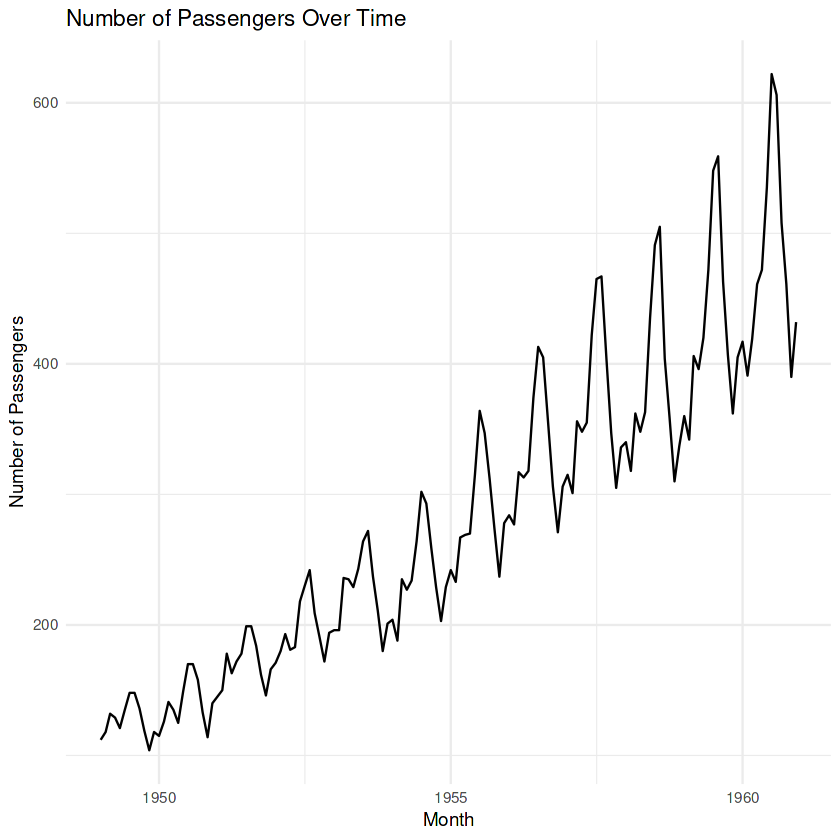

In [8]:
# Set 'month' as the index (not strictly necessary in R but useful for plotting)
df <- df %>% arrange(month)

# Plot the data
ggplot(df, aes(x = month, y = value)) +
  geom_line() +
  labs(title = "Number of Passengers Over Time", x = "Month", y = "Number of Passengers") +
  theme_minimal()

Applying a 12-month rolling average to the 'value' column to smooth out short-term fluctuations and highlight longer-term trends, then plotting this smoothed data with 'Date' as the x-axis label for better visualization.


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




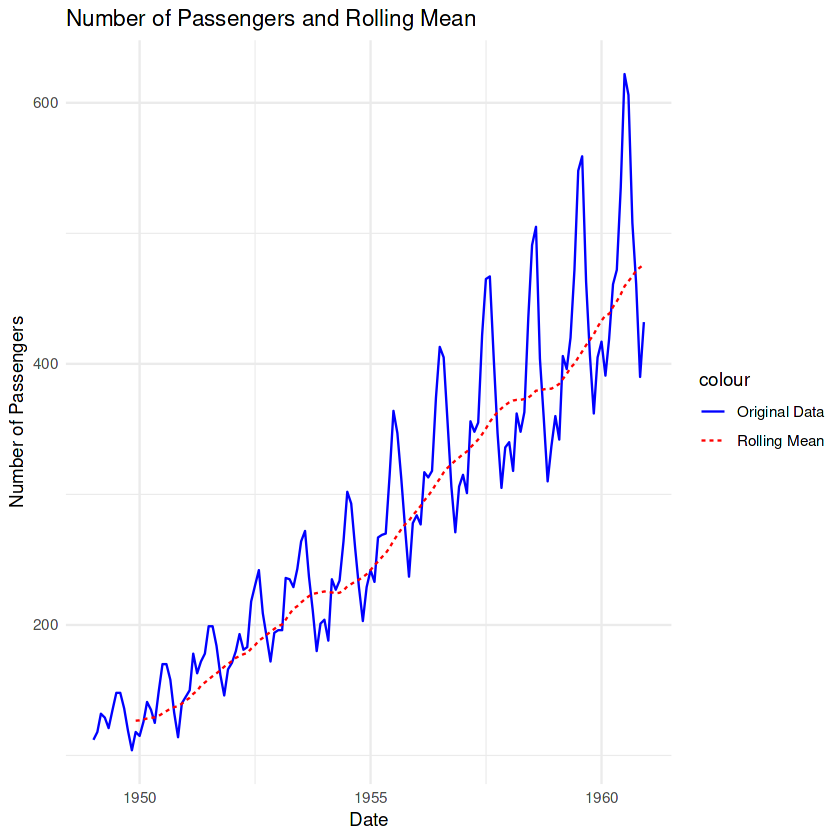

In [9]:
library(zoo)

# Calculate the rolling mean
df$rolling_mean <- rollmean(df$value, k = 12, fill = NA, align = "right")

# Plot the rolling mean
ggplot(df, aes(x = month)) +
  geom_line(aes(y = value, color = "Original Data")) +
  geom_line(aes(y = rolling_mean, color = "Rolling Mean"), linetype = "dashed") +
  labs(title = "Number of Passengers and Rolling Mean",
       x = "Date",
       y = "Number of Passengers") +
  theme_minimal() +
  scale_color_manual(values = c("Original Data" = "blue", "Rolling Mean" = "red"))


## Stationarity
• Testing for stationarity \
– We can use the Augmented Dickey-Fuller test (ADF) to test the time series for stationarity

Question 3.1: What are the null hypothesis and alternate hypothesis in this case?

# Your answer here

Null hypothesis for Dickey fuller test is that we assume the time series data to be stationary.
Alternate hypothesis is that we assume the time series data to be not stationary.

Question 3.2: What are you doing by performing the Augmented Dickey-Fuller (ADF) test on the 'value' column, and how do you interpret the ADF statistic and p-value to determine if the data is stationary?

# Your answer here 

Performing the Augmented Dickey-Fuller (ADF) test on the 'value' column is a statistical procedure to check whether the data in that column is stationary or non-stationary.

When interpreting the results of the Augmented Dickey-Fuller (ADF) test, you focus primarily on two key outputs: the ADF test statistic and the p-value.

The ADF statistic measures the strength of evidence against the null hypothesis which assumes the data has a unit root, or is non-stationary. A more negative ADF statistic suggests stronger evidence for rejecting the null hypothesis of non-stationarity.

A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, suggesting that the series is stationary. A large p-value (typically greater than 0.05) indicates weak evidence against the null hypothesis, meaning the series likely has a unit root and is non-stationary.

Question 3.3: Write the code to perform the Augmented Dickey-Fuller (ADF) test on the 'value' column of the DataFrame df to check for stationarity. After running the code, determine whether the data is stationary based on the p-value.

 > Hint : Check the tseries library to perform the test (adf function)
 > * Don't Forget to perform this y <- diffinv(x) before the adf test check the docs here - https://cran.r-project.org/web/packages/tseries/tseries.pdf
 > * https://uribo.github.io/rpkg_showcase/date_and_time/tseries.html
 > * https://rdrr.io/cran/tseries/

In [10]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [11]:
x <- df$value
y <- diffinv(x)

adf_test <- adf.test(y)

print(adf_test)

# Answer in the markdown below


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = 2.6449, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary



# Interpretation of the ADF test

Dickey-Fuller value (2.6449): This is a positive value, which suggests that there is weak evidence against the null hypothesis (which suggests non-stationarity).

p-value (0.99): The p-value is very high (much greater than 0.05), which further confirms that you fail to reject the null hypothesis.
This means the series is non-stationary.

• If the data is not stationary, and if we intend to use a model like ARIMA, the data has to
be transformed. \
• Two most common methods to transform series to stationary are:

* Transformations: eg. log or square root or combinations of these transformations to
stabilize non-constant variance.
* Differencing: subtract current value from previous (with a certain degree)

Check this out for more information, and an implementation in Python!: \
https://www.kaggle.com/code/rdizzl3/time-series-transformations

Question 3.4: Create a new dataframe using suitable differencing order, to convert the data
to stationary time series. 
 > Hint: You can use the same function to confirm the time series is stationary after transformation.

Try to perform first order differencing and observe how the values changes (ADF statistic and p-value), also observe the change in ACF and PACF plots \
Always try to plot the graphs before making the final decision

In [12]:
x <- df$value

# Apply first differencing
diff_x <- diff(x)

# Perform the ADF test again on the differenced series
adf_test_diff <- adf.test(diff_x)

print(adf_test_diff)


	Augmented Dickey-Fuller Test

data:  diff_x
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



# Conclusion

Dickey-Fuller = -7.0177 implies that the statistic is highly negative, indicating that the differenced series is likely stationary.

The p-value of 0.01 is less than 0.05 (the typical significance level).
A p-value less than 0.05 means that you reject the null hypothesis (which states that the series is non-stationary).

Thus, we reject the null hypothesis and conclude that the time series (after first differencing) is now stationary.


## Autocorrelation Analysis
• We will experiment and plot two functions: 
* **ACF (Autocorrelation function)**: The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number
of periods or units.
* **PACF (Partial Autocorrelation function)**: Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

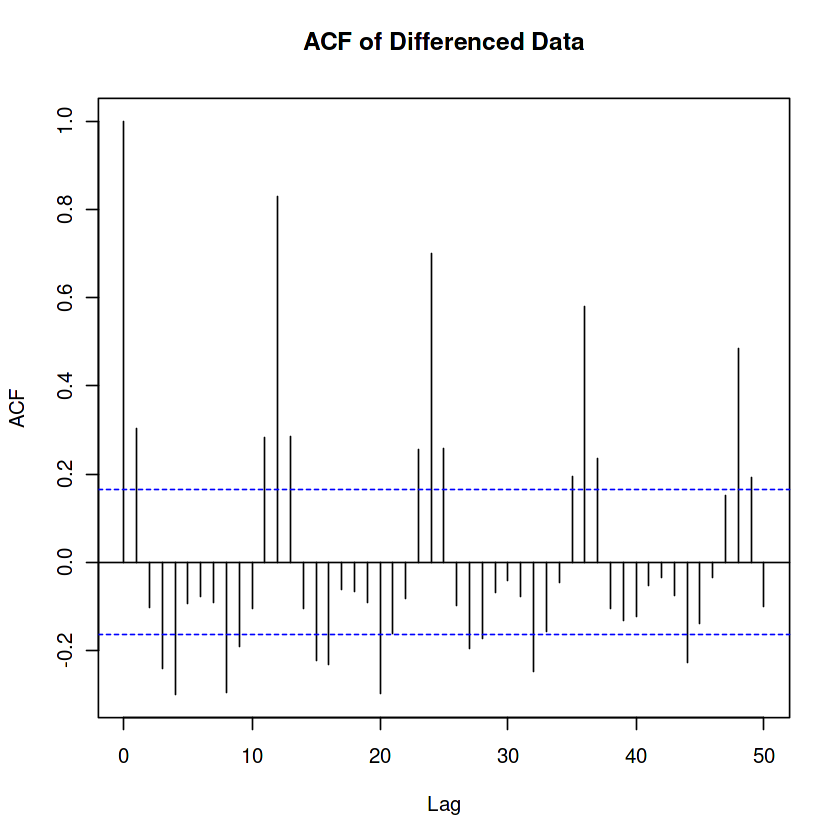

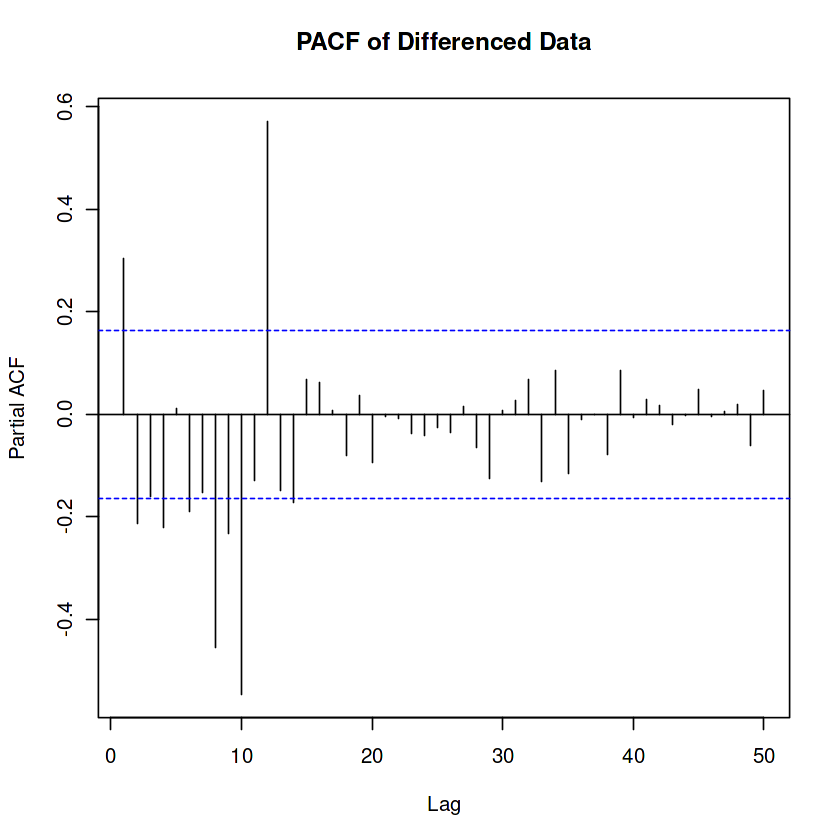

In [13]:
library(stats)

# Compute and plot ACF
acf_result <- acf(diff_x, lag.max = 50, main = "ACF of Differenced Data")

# Compute and plot PACF
pacf_result <- pacf(diff_x, lag.max = 50, main = "PACF of Differenced Data")

Question 3.5 : What are the values of p, q and d? How did you come to this conclusion,
looking at the ACF, PACF plots? \
> Hint: The value of d is decided by the order of differencing, as transformed in the previous
section.

# Your answer here

p value = 2
q value = 1
d value = 1

## Decomposition

Question 3.6: 
1. Decompose the **value** column into the constituent components, and plot them. 
2. Which model of time series did you use for decomposition, and why? (between additive and multiplicative models)

> Hint: The data is Sesonal, Look at the decompose function in stats library.

[1] "If the seasonal fluctuations grew or shrank in proportion to the trend (i.e., became larger as the trend increased), a multiplicative decomposition might be more appropriate. However, based on the constant magnitude of the seasonal component and the fairly stable randomness in the image, the additive model seems suitable."


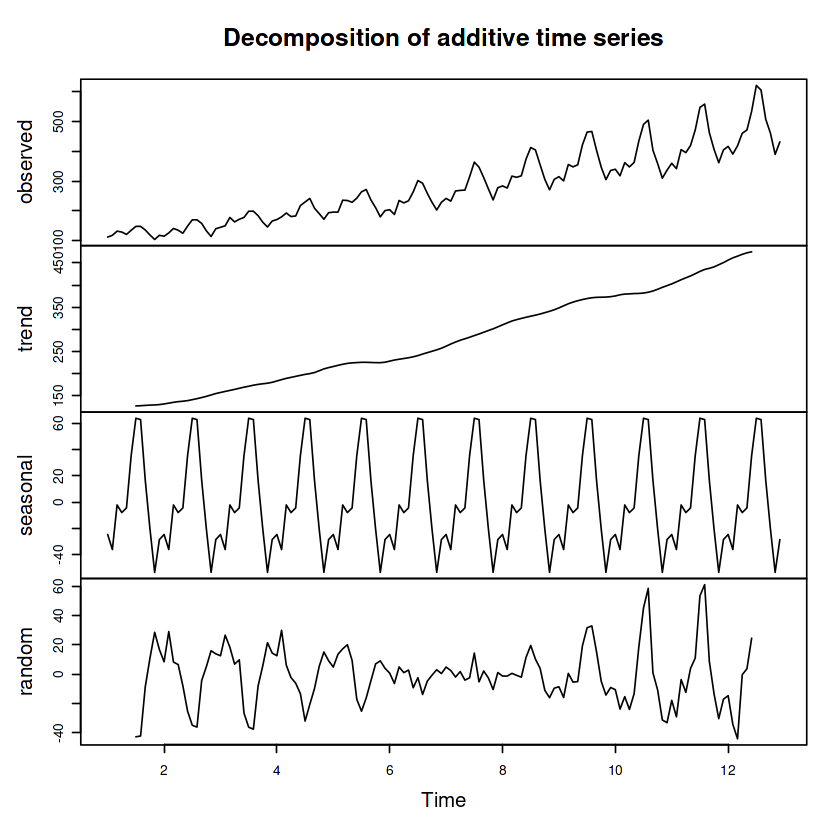

In [14]:
# Your answer here

value_ts <- ts(df$value, frequency = 12)

# We have used additive model 
decomposed_result <- decompose(value_ts)

plot(decomposed_result)

print("If the seasonal fluctuations grew or shrank in proportion to the trend (i.e., became larger as the trend increased), a multiplicative decomposition might be more appropriate. However, based on the constant magnitude of the seasonal component and the fairly stable randomness in the image, the additive model seems suitable.")

Note: Sometimes, we look at upsampling or downsampling the data. For instance, if we
have sensor data for each second, we might not need such granular data, and we
downsample the data to daily data or hourly data or so.
Explore further here: https://machinelearningmastery.com/resample-interpolatetime-series-data-python/

You can also explore adding the decomposed versions of each feature (column) to your data, and utilize it
as exogenous variables for multivariate forecasting! This would require you to decompose all features, such
as temperature, rainfall, etc. as well, which is out of scope of this worksheet.

## Exponential Smoothing

Question 3.7:

• Perform forecasts using Single, Double and Triple Exponential Smoothing. \
• Plot forecasts of all three forecasts (using different colors), against the true values. (Use lines) \
• Only one function needed for all three forecasts, only requiring you to change the parameters to get each of the 3 models. \
• Hint: look at the ExponentialSmoothing function \
• Go ahead, and experiment with the values of alpha, beta and gamma and see how the forecast changes.

> Hint: Use the forecast library

In [15]:
# Your answer here

library(forecast)

In [16]:
# Function to perform Exponential Smoothing forecasts
perform_forecast <- function(time_series, alpha = NULL, beta = NULL, gamma = NULL, h = 12) {
  # Perform Exponential Smoothing using given parameters
  model <- ets(time_series, model = "ZZZ", alpha = alpha, beta = beta, gamma = gamma)
  
  # Forecast the future values
  forecast_result <- forecast(model, h = h)
  
  return(forecast_result)
}

In [17]:
value_ts <- ts(df$value, frequency = 12)

ses_forecast <- perform_forecast(value_ts, alpha = 0.5)

des_forecast <- perform_forecast(value_ts, alpha = 0.5, beta = 0.3)

tes_forecast <- perform_forecast(value_ts, alpha = 0.5, beta = 0.3, gamma = 0.2)

[1] "Model: ETS(A,N,A)"
[1] "Model: ETS(A,Ad,A)"
[1] "Model: ETS(A,A,A)"
[1] "Model: ETS(M,N,A)"
[1] "Model: ETS(M,N,M)"
[1] "Model: ETS(M,Ad,A)"
[1] "Model: ETS(M,A,A)"
[1] "Model: ETS(M,Ad,M)"
[1] "Model: ETS(M,A,M)"
[1] "Model: ETS(A,N,A)"
[1] "Model: ETS(A,Ad,A)"
[1] "Model: ETS(A,A,A)"
[1] "Model: ETS(M,N,A)"
[1] "Model: ETS(M,N,M)"
[1] "Model: ETS(M,Ad,A)"
[1] "Model: ETS(M,A,A)"
[1] "Model: ETS(M,Ad,M)"
[1] "Model: ETS(M,A,M)"


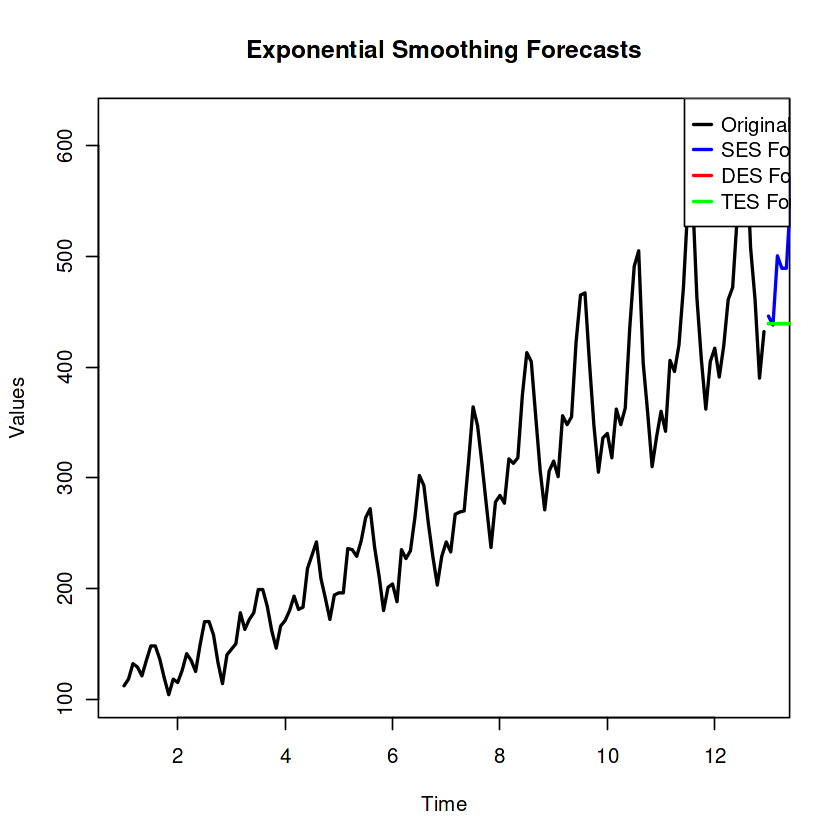

In [18]:
par(mfrow = c(1,1))

plot(value_ts, col = "black", lwd = 2, main = "Exponential Smoothing Forecasts",
     ylab = "Values", xlab = "Time")

lines(ses_forecast$mean, col = "blue", lwd = 2)

lines(des_forecast$mean, col = "red", lwd = 2)

lines(tes_forecast$mean, col = "green", lwd = 2)

legend("topright", legend = c("Original", "SES Forecast", "DES Forecast", "TES Forecast"),
       col = c("black", "blue", "red", "green"), lwd = 2)

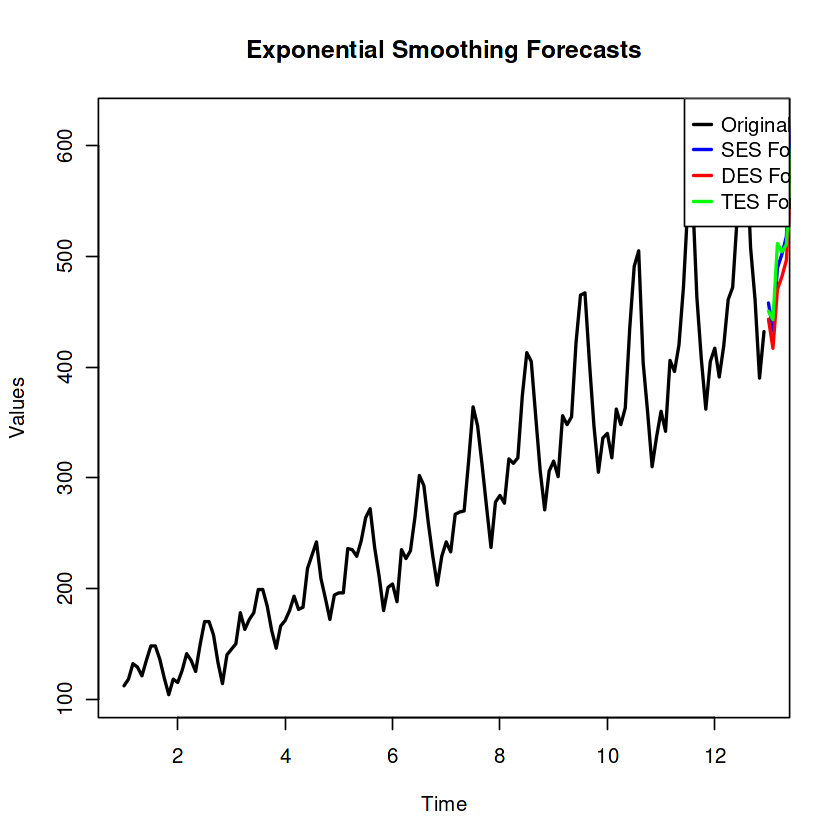

In [19]:
# Trying with different weights

value_ts <- ts(df$value, frequency = 12)

ses_forecast <- perform_forecast(value_ts, alpha = 0.1)

des_forecast <- perform_forecast(value_ts, alpha = 0.1, beta = 0.1)

tes_forecast <- perform_forecast(value_ts, alpha = 0.1, beta = 0.1, gamma = 0.1)

par(mfrow = c(1,1))

plot(value_ts, col = "black", lwd = 2, main = "Exponential Smoothing Forecasts",
     ylab = "Values", xlab = "Time")

lines(ses_forecast$mean, col = "blue", lwd = 2)

lines(des_forecast$mean, col = "red", lwd = 2)

lines(tes_forecast$mean, col = "green", lwd = 2)

legend("topright", legend = c("Original", "SES Forecast", "DES Forecast", "TES Forecast"),
       col = c("black", "blue", "red", "green"), lwd = 2)

In [20]:
library(Metrics)

# Define the function to calculate metrics
calculate_metrics <- function(actual_values, predicted_values) {
  mae_value <- mae(actual_values, predicted_values)
  mse_value <- mse(actual_values, predicted_values)
  rmse_value <- rmse(actual_values, predicted_values)
  mape_value <- mean(abs((actual_values - predicted_values) / actual_values)) * 100
  
  return(list(MAE = mae_value, MAPE = mape_value, MSE = mse_value, RMSE = rmse_value))
}

# Generate some example data and forecasts (replace with your actual data and forecasts)
# For demonstration purposes, assuming `df` contains the actual values and the 
#   forecasts are for the next 12 periods
forecast_periods <- 12
actual_values <- tail(df$value, forecast_periods)

print("For forecast_single")
sample_df <- forecast(ses_forecast, h = forecast_periods)
forecast_single <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
s_metric <- calculate_metrics(actual_values,forecast_single)
print(s_metric)

print("For forecast_double")
sample_df <- forecast(des_forecast, h = forecast_periods)
forecast_double <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
d_metric <- calculate_metrics(actual_values,forecast_double)
print(d_metric)

print("For forecast_triple")
sample_df <- forecast(tes_forecast, h = forecast_periods)
forecast_triple <- as.numeric(forecast(sample_df, h = forecast_periods)$mean)
t_metric <- calculate_metrics(actual_values,forecast_triple)
print(t_metric)

metrics_summary <- rbind(
  SINGLE = s_metric,
  DOUBLE = d_metric,
  TRIPLE = t_metric
)

print(metrics_summary)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




[1] "For forecast_single"
$MAE
[1] 50.94913

$MAPE
[1] 10.7668

$MSE
[1] 2706.533

$RMSE
[1] 52.02435

[1] "For forecast_double"
$MAE
[1] 25.78376

$MAPE
[1] 5.466197

$MSE
[1] 775.0299

$RMSE
[1] 27.83936

[1] "For forecast_triple"
$MAE
[1] 38.89745

$MAPE
[1] 8.480437

$MSE
[1] 1873.836

$RMSE
[1] 43.28783

       MAE      MAPE     MSE      RMSE    
SINGLE 50.94913 10.7668  2706.533 52.02435
DOUBLE 25.78376 5.466197 775.0299 27.83936
TRIPLE 38.89745 8.480437 1873.836 43.28783


Question 3.8: Compare accuracy metrics (MAE, MAPE, MSE, RMSE) of the three models with the original series.

# Your answer here 

Comparing MAE of all the 3 double exponential smoothing gives less MAE

Comparing MAPE of all the 3 double exponential smoothing gives less MAPE

Comparing MSE of all the 3 double exponential smoothing gives less MSE

Comparing RMSE of all the 3 double exponential smoothing gives less RMSE

## Time Series Forecasting using Statistical Models

• Before we apply models for forecasting, we need to create a training and validation/test set, as would
be the procedure for most machine learning problems. \
• However, one thing to keep in mind while performing this split for time series data: NEVER perform
a random split.

Question 3.9: Why do you think we shouldn’t perform a random split on our data to create a train/test/dev set?

#  Your answer here

Time series data consists of observations collected at specific time intervals, where each observation may depend on the previous ones. A random split could break this temporal structure, leading to a lack of meaningful training and testing scenarios.

Instead of random splitting, we should use a time-based split, where we take the initial portion of the time series data as the training set and the latter portion as the validation/test set. This ensures that:

* The training set only contains historical data.
* The validation/test set consists of future data points that the model has not seen during training.

Question 3.10: Implement AR, MA and ARMA models, with the optimal values of p and q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

> Hint: Look at ARMA function in forecast library

In [21]:
library(tsibble)
library(rsample)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [22]:
df_tsibble <- df %>% 
  as_tsibble(index = month) 

In [23]:
# Define the number of splits and sizes
n_splits <- 2
train_size <- 100
test_size <- 40

# Initialize Time Series Split
ts_split <- rolling_origin(df_tsibble, 
                           initial = train_size, 
                           assess = test_size,
                           skip = 1) 

# Create a list to store splits
splits <- list()

# Perform the split
for (split in ts_split$splits) {
  train <- analysis(split)
  test <- assessment(split)
  splits <- append(splits, list(list(train = train, test = test)))
}

# Extract the first (and only) train-test split
first_split <- splits[[1]]
train <- first_split$train
test <- first_split$test

Example:  
ar_model <- Arima(train, order = c(p, 0, 0)) \
ar_forecast <- forecast(ar_model, h = length(test_ts))

In [24]:
# Your answer here
# AR model
ar_model <- arima(train$value, order = c(2, 0, 0))
print(ar_model)

ar_forecast <- forecast(ar_model, h = length(test$value))
print(ar_forecast)


Call:
arima(x = train$value, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      1.1962  -0.2515   220.0067
s.e.  0.0961   0.0984    36.6609

sigma^2 estimated as 514.6:  log likelihood = -455.35,  aic = 918.7
    Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
101       338.9027 309.8310 367.9744 294.44138 383.3641
102       330.0330 284.7065 375.3595 260.71212 399.3539
103       321.7115 264.8787 378.5442 234.79328 408.6297
104       313.9885 248.6361 379.3409 214.04070 413.9363
105       306.8436 234.9470 378.7401 196.88729 416.7998
106       300.2395 223.1794 377.2997 182.38621 418.0929
107       294.1371 212.9246 375.3496 169.93333 418.3409
108       288.4987 203.9017 373.0957 159.11874 417.8787
109       283.2891 195.9063 370.6719 149.64864 416.9295
110       278.4757 188.7832 368.1682 141.30282 415.6486
111       274.0284 182.4102 365.6467 133.91047 414.1464
112       269.9194 176.6888 363.1501 127.33549 412.5034
113       266.1230 171.5376 360.7083 12

In [25]:
# MA model
ma_model <- arima(train$value, order = c(0, 0, 1))
print(ma_model)

ma_forecast <- forecast(ma_model, h = length(test$value))
print(ma_forecast)


Call:
arima(x = train$value, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.9673   218.1777
s.e.  0.0329     7.9521

sigma^2 estimated as 1650:  log likelihood = -513.69,  aic = 1033.38
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       263.9871 211.9302 316.0440 184.3729 343.6013
102       218.1777 145.7547 290.6008 107.4162 328.9392
103       218.1777 145.7547 290.6008 107.4162 328.9392
104       218.1777 145.7547 290.6008 107.4162 328.9392
105       218.1777 145.7547 290.6008 107.4162 328.9392
106       218.1777 145.7547 290.6008 107.4162 328.9392
107       218.1777 145.7547 290.6008 107.4162 328.9392
108       218.1777 145.7547 290.6008 107.4162 328.9392
109       218.1777 145.7547 290.6008 107.4162 328.9392
110       218.1777 145.7547 290.6008 107.4162 328.9392
111       218.1777 145.7547 290.6008 107.4162 328.9392
112       218.1777 145.7547 290.6008 107.4162 328.9392
113       218.1777 145.7547 290.6008 107.4162 328.9392
114       218.1777 145.

In [26]:
# ARMA model
arma_model <- arima(train$value, order = c(2, 0, 1))
print(arma_model)

arma_forecast <- forecast(arma_model, h = length(test$value))
print(arma_forecast)


Call:
arima(x = train$value, order = c(2, 0, 1))

Coefficients:
         ar1     ar2     ma1  intercept
      0.3914  0.5240  0.8976   219.9140
s.e.  0.1643  0.1666  0.1081    41.8711

sigma^2 estimated as 470.3:  log likelihood = -451.19,  aic = 912.37
    Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
101       328.4526 300.6618 356.2434 285.95021 370.9550
102       329.5110 284.1732 374.8487 260.17280 398.8491
103       319.6825 266.0871 373.2779 237.71542 401.6496
104       316.3903 254.9909 377.7898 222.48796 410.2927
105       309.9517 242.9974 376.9060 207.55397 412.3495
106       305.7067 233.8276 377.5858 195.77712 415.6362
107       300.6714 224.8197 376.5232 184.66626 416.6766
108       296.4763 217.1609 375.7917 175.17385 417.7788
109       292.1960 209.9478 374.4442 166.40820 417.9837
110       288.3225 203.5174 373.1276 158.62425 418.0207
111       284.5636 197.5465 371.5806 151.48248 417.6446
112       281.0627 192.1092 370.0162 145.02003 417.1053
113       277.722

In [27]:
length(test$month)

[1] 40

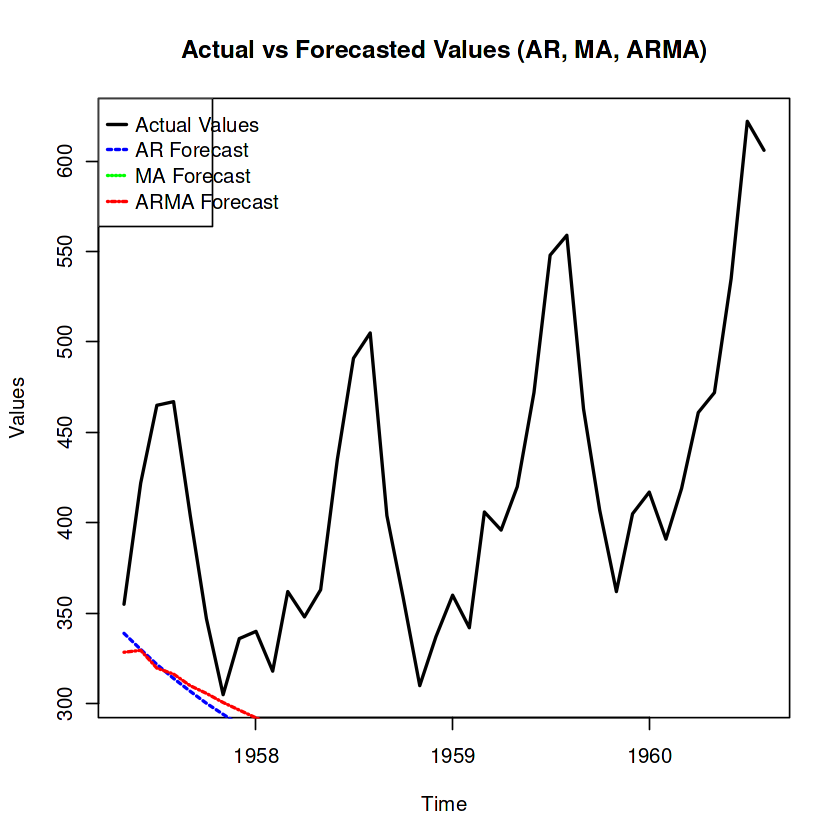

In [28]:
# Plot the actual test data first
plot(test$month, test$value, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Values", main = "Actual vs Forecasted Values (AR, MA, ARMA)")

# Add the AR forecasted values to the plot as a blue line
lines(test$month, ar_forecast$mean, 
      col = "blue", lwd = 2, lty = 2)

# Add the MA forecasted values to the plot as a green line
lines(test$month, ma_forecast$mean, 
      col = "green", lwd = 2, lty = 3)

# Add the ARMA forecasted values to the plot as a red line
lines(test$month, arma_forecast$mean, 
      col = "red", lwd = 2, lty = 4)

# Add a legend to the plot
legend("topleft", legend = c("Actual Values", "AR Forecast", "MA Forecast", "ARMA Forecast"),
       col = c("black", "blue", "green", "red"), lwd = 2, lty = c(1, 2, 3, 4))


Question 3.11 : Implement the ARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Plot the graph between forecasts and true values.

In [29]:
# Your answer here
# ARIMA
arima_model <- arima(train$value, order = c(2, 1, 1))
print(arima_model)

arima_forecast <- forecast(arima_model, h = length(test$value))


Call:
arima(x = train$value, order = c(2, 1, 1))

Coefficients:
          ar1     ar2     ma1
      -0.5919  0.0374  0.9295
s.e.   0.1314  0.1180  0.0875

sigma^2 estimated as 479.7:  log likelihood = -446.41,  aic = 900.81


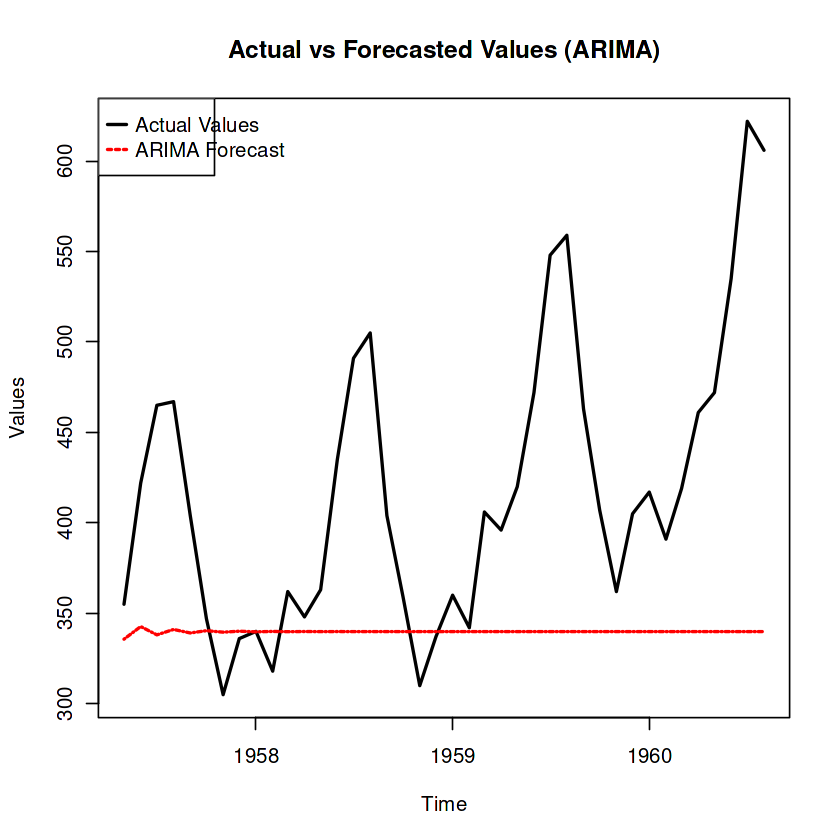

In [30]:
# Plot the actual test data first
plot(test$month, test$value, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Values", main = "Actual vs Forecasted Values (ARIMA)")

lines(test$month, arima_forecast$mean, col = "red", lwd = 2, lty = 4)

# Add a legend to the plot
legend("topleft", legend = c("Actual Values", "ARIMA Forecast"),
       col = c("black","red"), lwd = 2, lty = c(1, 2))


Question 3.11: 

1. Which models performed better? The exponential smoothing models, or the statistical models (AR, MA, ARMA, ARIMA). Why? 
2. Is this always the case? 
3. Do you think you’d get a better result if you used SARIMA? 

In [31]:
calculate_metrics <- function(actual, forecast) {
  mae <- mean(abs(actual - forecast), na.rm = TRUE)
  mape <- mean(abs((actual - forecast) / actual), na.rm = TRUE) * 100
  mse <- mean((actual - forecast)^2, na.rm = TRUE)
  rmse <- sqrt(mse)
  
  return(data.frame(MAE = mae, MAPE = mape, MSE = mse, RMSE = rmse))
}

metrics_ar <- calculate_metrics(actual_values, ar_forecast$mean)
metrics_ma <- calculate_metrics(actual_values, ma_forecast$mean)
metrics_arma <- calculate_metrics(actual_values, arma_forecast$mean)
metrics_arima <- calculate_metrics(actual_values, arima_forecast$mean)

metrics_summary <- rbind(
  AR = metrics_ar,
  MA = metrics_ma,
  ARMA = metrics_arma,
  ARIMA = metrics_arima
)

print(metrics_summary)

           MAE     MAPE      MSE     RMSE
AR    213.2405 44.08304 51868.23 227.7460
MA    251.4270 52.36294 68702.31 262.1113
ARMA  204.4759 42.20182 47916.34 218.8980
ARIMA 130.9336 26.23277 22452.19 149.8406


# Your answer here

The Akaike Information Criterion quantifies the trade-off between the goodness of fit of the model and its complexity (number of parameters). Lower AIC values indicate a better model.

given below are the AIC values of AR, MA, ARMA, or ARIMA models

* AR = 918.7
* MA = 1033.38
* ARMA = 912.37
* ARIMA = 900.81

The lowest AIC value is ARIMA model.

# your answer 

Among stastical models ARIMA has the best MAE, MAPE, MSE and RMSE score, but if we take exponential smoothing model the MAE, MAPE, MSE and RMSE is lowest with double exponential smoothing ,hence this is the better model.

## SARIMA

Question 3.12: Implement the SARIMA model, with the optimal values of p, d, q as calculated from PACF and ACF plots previously. \
Use Seasonal Order=(2, 1, 0, 12) \
Plot the graph between forecasts and true values.

In [32]:
# Your answer here

# Fit the SARIMA model with the specified order and seasonal order
sarima_model <- Arima(train$value, order = c(2, 1, 1), 
                      seasonal = list(order = c(2, 1, 0), period = 12))
print(sarima_model)

# Generate forecast for the length of the test set
sarima_forecast <- forecast(sarima_model, h = length(test$value))
print(sarima_forecast)

Series: train$value 
ARIMA(2,1,1)(2,1,0)[12] 

Coefficients:
          ar1      ar2     ma1     sar1    sar2
      -0.7646  -0.0598  0.5321  -0.2011  0.0317
s.e.   0.1537   0.2224  0.0873   0.2744  0.1768

sigma^2 = 93.86:  log likelihood = -318.76
AIC=649.52   AICc=650.57   BIC=664.31
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       354.6349 342.2189 367.0508 335.6463 373.6235
102       407.2181 391.5666 422.8696 383.2812 431.1550
103       449.7053 430.5783 468.8323 420.4531 478.9575
104       438.8802 417.2750 460.4853 405.8379 471.9224
105       392.3799 368.2775 416.4822 355.5185 429.2413
106       344.9901 318.7974 371.1828 304.9318 385.0484
107       309.4746 281.2392 337.7101 266.2923 352.6570
108       345.9976 315.9257 376.0694 300.0067 391.9884
109       354.2800 322.4342 386.1258 305.5760 402.9840
110       341.6783 308.1802 375.1764 290.4473 392.9093
111       393.9013 358.8105 428.9920 340.2346 447.5679
112       386.4822 349.8798 423.0846 330.5036 442.460

## Making Predictions

You have implemented multiple forecasting models, including ARIMA, SARIMA, and Exponential Smoothing, now select the **best model** and generate forecasts for the period following the training data, from the end of the training set to the end of the entire dataset.

Replace **selected_model** with the variable name of the best-performing model you have chosen. \
Note: Ensure that selected_model is replaced with the actual model variable you have selected after fitting and evaluating your models. This code will generate and plot forecasts using the chosen model, allowing you to compare them against the actual values from the test dataset.

In [33]:
# Your answer here

selected_model <- sarima_model

Provide the code for the selected model and then uncomment the following cells one by one to make predictions, forecast, and plot the graphs.

In [34]:
summary(selected_model)

Series: train$value 
ARIMA(2,1,1)(2,1,0)[12] 

Coefficients:
          ar1      ar2     ma1     sar1    sar2
      -0.7646  -0.0598  0.5321  -0.2011  0.0317
s.e.   0.1537   0.2224  0.0873   0.2744  0.1768

sigma^2 = 93.86:  log likelihood = -318.76
AIC=649.52   AICc=650.57   BIC=664.31

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4731138 8.773055 6.363268 0.1438626 2.845172 0.3383263
                     ACF1
Training set -0.008561337

In [35]:
train_prediction <- fitted(selected_model)

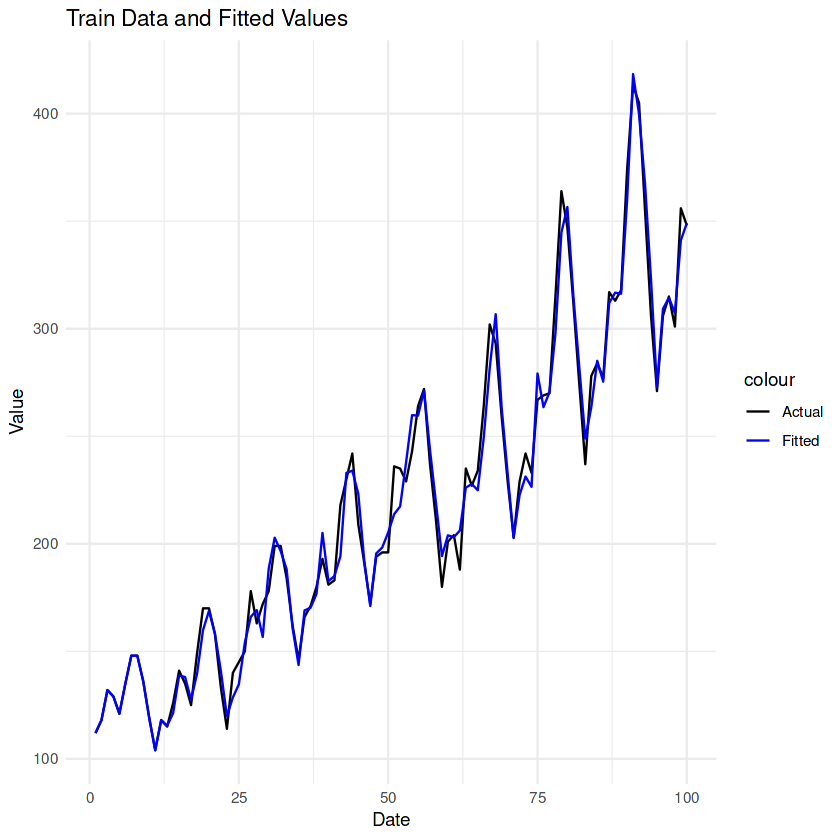

In [36]:
plot_data <- data.frame(
    Date = time(train$month),
    Actual = as.numeric(train$value),
    Fitted = as.numeric(train_prediction)
  )

ggplot(plot_data, aes(x = Date)) +
   geom_line(aes(y = Actual, color = "Actual")) +
   geom_line(aes(y = Fitted, color = "Fitted")) +
   labs(title = "Train Data and Fitted Values",
        x = "Date", y = "Value") +
   scale_color_manual(values = c("Actual" = "black", "Fitted" = "blue")) +
   theme_minimal()

In [37]:
df_ts <- ts(df$value, frequency = 12)

In [38]:
start_index <- length(train) + 1
end_index <- length(df_ts)

# Generate predictions
prediction <- forecast(sarima_model, h = (end_index - start_index + 1))

# Rename the predictions
prediction_df <- data.frame(prediction = as.numeric(prediction$mean))

# Optional: add index for plotting
prediction_df$Date <- time(df_ts)[start_index:end_index]

# View the prediction
print(prediction_df)

    prediction      Date
1     354.6349  1.250000
2     407.2181  1.333333
3     449.7053  1.416667
4     438.8802  1.500000
5     392.3799  1.583333
6     344.9901  1.666667
7     309.4746  1.750000
8     345.9976  1.833333
9     354.2800  1.916667
10    341.6783  2.000000
11    393.9013  2.083333
12    386.4822  2.166667
13    392.9376  2.250000
14    446.5414  2.333333
15    488.0206  2.416667
16    478.0420  2.500000
17    430.3671  2.583333
18    382.3016  2.666667
19    346.9553  2.750000
20    382.9803  2.833333
21    391.5032  2.916667
22    378.3977  3.000000
23    431.6551  3.083333
24    423.9921  3.166667
25    430.5356  3.250000
26    483.8257  3.333333
27    525.6183  3.416667
28    515.3798  3.500000
29    468.0521  3.583333
30    420.1735  3.666667
31    384.7769  3.750000
32    420.9503  3.833333
33    429.4021  3.916667
34    416.4422  4.000000
35    469.4036  4.083333
36    461.8080  4.166667
37    468.3281  4.250000
38    521.7137  4.333333
39    563.4113  4.416667


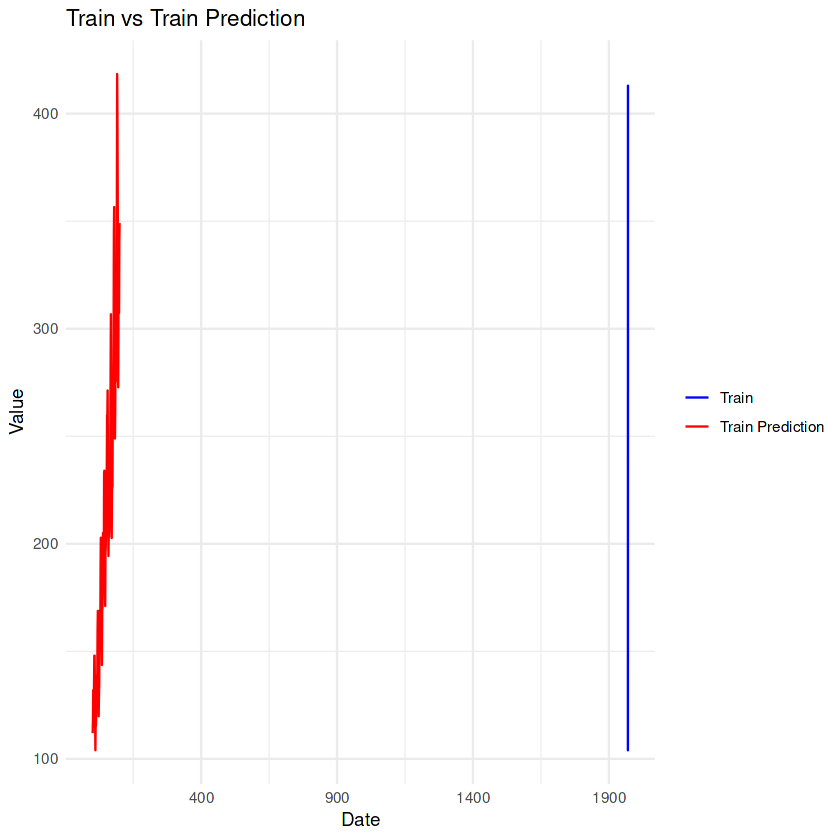

In [39]:
# Convert train_ts to a data frame
train_df <- data.frame(
    Date = as.Date(time(train$month), origin = "1970-01-01"),  # Extract time index and convert to Date
    Value = as.numeric(train$value),  # Convert ts object to numeric values
    Type = "Train"
  )

# Ensure that train_prediction has compatible time indices
train_prediction_df <- data.frame(
    Date = as.Date(time(train_prediction), origin = "1970-01-01"),  # Extract time index from train_prediction and convert to Date
    Value = as.numeric(train_prediction),  # Convert ts object to numeric values
    Type = "Train Prediction"
  )

# Combine both data frames
plot_data <- rbind(train_df, train_prediction_df)

# Plot using ggplot2
ggplot(plot_data, aes(x = Date, y = Value, color = Type)) +
    geom_line() +
    labs(title = "Train vs Train Prediction",
         x = "Date", y = "Value") +
    scale_color_manual(values = c("Train" = "blue", "Train Prediction" = "red")) +
    theme_minimal() + 
    theme(legend.title = element_blank())

Congratulations on reaching the end of this worksheet! I hope you enjoyed it, and have an understanding of how practical time series analysis works.

Some advanced concepts for you to explore are listed below:

* One of the main errors of dealing with time-series data includes preventing lookahead. It’s extremely
important that you aren’t looking at future values to predict earlier ones. You can read more about it
here: https://bowtiedraptor.substack.com/p/look-ahead-bias-and-how-to-prevent
* Although the dataset provided to you for this worksheet was cleaned prior, real world data is extremely
dirty. Time series data especially tends to contain quite a few missing values. Try to explore some
ways of taking care of missing values in data. Some techniques include imputation, forward fills,
interpolation, moving averages, etc.
* Understanding some Classical Machine Learning techniques for Time Series Forecasting, such as Decision
Trees, Forests, Feed-forward Neural Networks, etc.
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ \
https://www.section.io/engineering-education/feedforward-and-recurrent-neural-networks-pythonimplementation/